<a href="https://colab.research.google.com/github/jahnvisikligar/Data-Science-Challenge/blob/main/Data_Science_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

**Performing Exploratory df Analysis(EDA)**

In [ ]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
df.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [ ]:
df.sample(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1951,1952,45,736,284,2,debit,2017-03-07 4:56:18
1517,1518,74,931,459,3,debit,2017-03-18 13:11:58
541,542,61,716,158,1,debit,2017-03-01 13:28:39
1025,1026,84,813,306,2,credit_card,2017-03-23 8:43:01
1105,1106,9,902,118,1,debit,2017-03-26 15:14:57


In [ ]:
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


As from the above table it can be seen that the AOV predicted is the average of values of 'order_amount' column.




In [ ]:
#exploring the unique values of each attribute
print("Number of unique order ID: ", df['order_id'].nunique())
print("Number of unique shop ID: ",df['shop_id'].nunique())
print("Number of customers:", df['user_id'].nunique() )
#print("number of unique order amounts by customers: ", df['order_amount'].nunique())
#print('Number of total_items: ',df['total_items'].nunique())

Number of unique order ID:  5000
Number of unique shop ID:  100
Number of customers: 301


**Computing AOV(Average Order Value)**

In [ ]:
order_amt_sum = df['order_amount'].sum()
total_items_sum = df['total_items'].sum()

print(f'Total number of items purchased with outliers: ${order_amt_sum:,.2f}')
print(f'Total number of items purchased with outliers: {total_items_sum}')
#print(order_amt_sum)
#print(total_items_sum)

Total number of items purchased with outliers: $15,725,640.00
Total number of items purchased with outliers: 43936


In [ ]:
new_aov = order_amt_sum/total_items_sum
print(f'New Average order value: ${new_aov:,.2f}')

New Average order value: $357.92


**Working with Outliers**



> Checking Oultiers



In [ ]:
numeric_col = ['order_amount']

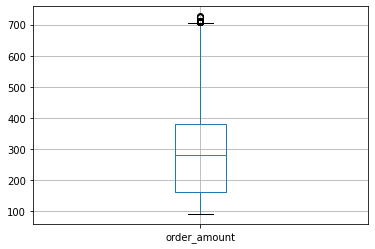

In [ ]:
df.boxplot(numeric_col)

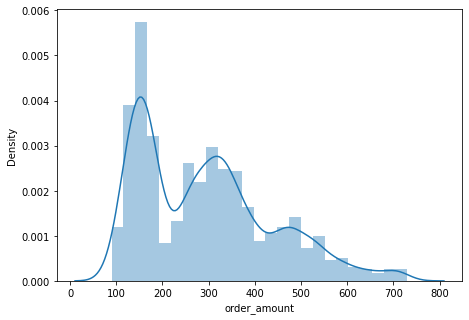

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['order_amount'])



> Removing Outliers



In [ ]:
for x in ['order_amount']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
df.isnull().sum()

order_id            0
shop_id             0
user_id             0
order_amount      141
total_items         0
payment_method      0
created_at          0
dtype: int64

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.714772,1.950196
std,1443.356555,29.049171,86.887496,144.451583,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,727.075558,5.000000


**Computing new AOV without outliers**

In [ ]:
new_order_amt_sum = df['order_amount'].sum()
new_total_items_sum = df['total_items'].sum()

print(f'Total number of items purchased without outliers: ${new_order_amt_sum:,.2f}')
print(f'Total number of items purchased without outliers: {new_total_items_sum}')
#print(order_amt_sum)
#print(total_items_sum)

Total number of items purchased without outliers: $1,427,160.08
Total number of items purchased without outliers: 9476


In [ ]:
new_aov_1 = new_order_amt_sum/new_total_items_sum
print(f'New Average order value: ${new_aov_1:,.2f}')

New Average order value: $150.61
